In [1]:
from nmon import *

 /Users/nikolaygusarov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py: 34

In [43]:
# EC_shunt = 0.18

EC_shunt = 0.863
EJ_tot = 13.206
d = 0.6

EC_shunt = 2.458
EJ_tot = 13.206
d=0.359

EC_shunt = 0.863
EJ_tot = 30.726
d=0.309



EJM_EC = (1+d)/2 * EJ_tot / EC_shunt
EJN_EC = (1-d)/2 * EJ_tot / EC_shunt


N_ng1 = 30
N_flux = 5

ng1_list = np.linspace(0, 1, N_ng1)
flux_list = np.linspace(0, 0.5, N_flux)

w01_list = np.full([N_ng1, N_flux], None, dtype=float)
w12_list = np.full([N_ng1, N_flux], None, dtype=float)
E0_list = np.full([N_ng1,  N_flux], None, dtype=float)
E1_list = np.full([N_ng1,  N_flux], None, dtype=float)
E2_list = np.full([N_ng1,  N_flux], None, dtype=float)
relative_anharm_list = np.full([N_ng1,  N_flux], None, dtype=float)

nmon = Nmon(N=1, M=1, EJN=EJN_EC*EC_shunt, EJM=EJM_EC*EC_shunt, EC_shunt=EC_shunt)



In [44]:
EJM_EC, EJN_EC

(23.302626882966393, 12.30108111239861)

In [45]:
for i, ng1 in enumerate(tqdm(ng1_list)):
    for k, flux in enumerate(flux_list):
        try:
            nmon.hamiltonian_calc(flux=flux, ng=[ng1], num_levels=6, make_plot=False, just_H=False, 
                                cutoff=31)
            w01_list[i, k] = nmon.transition_freqs[0]
            E0_list[i, k] = nmon.bound_state_energies[0]
            E1_list[i, k] = nmon.bound_state_energies[1]

            if len(nmon.transition_freqs) > 1:
                w12_list[i, k] = nmon.transition_freqs[1]
                E2_list[i, k] = nmon.bound_state_energies[2]
                relative_anharm_list[i, k] = nmon.relative_anharm

        except Exception:
            continue

format_list = (nmon.N, nmon.M, EJN_EC, EJM_EC,round(nmon.EC_shunt, 2))
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w01_list.npy".format(*format_list), w01_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w12_list.npy".format(*format_list), w12_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E0_list.npy".format(*format_list), E0_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E1_list.npy".format(*format_list), E1_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E2_list.npy".format(*format_list), E2_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_relative_anharm_list.npy".format(*format_list), relative_anharm_list)

100%|██████████| 30/30 [00:07<00:00,  3.88it/s]


In [46]:
format_list = (nmon.N, nmon.M, EJN_EC, EJM_EC,round(nmon.EC_shunt, 2))
w01_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w01_list.npy".format(*format_list))
w12_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w12_list.npy".format(*format_list))
E0_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E0_list.npy".format(*format_list))
E1_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E1_list.npy".format(*format_list))
E2_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E2_list.npy".format(*format_list))
relative_anharm_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_relative_anharm_list.npy".format(*format_list))

6.4872389206931695e-06


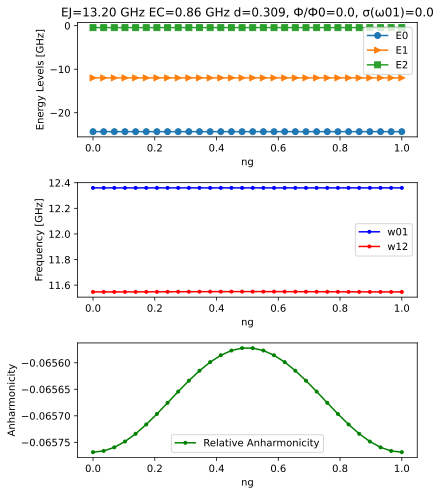

1.1776715148337027e-05


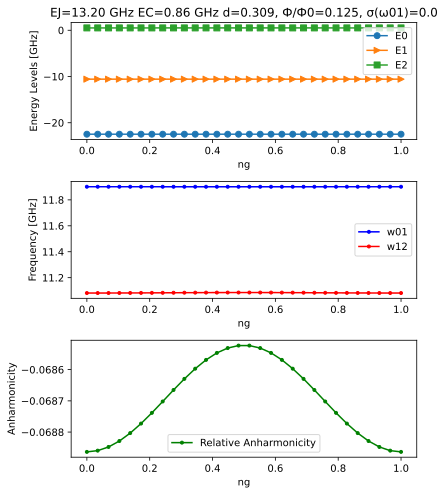

6.950694833046968e-05


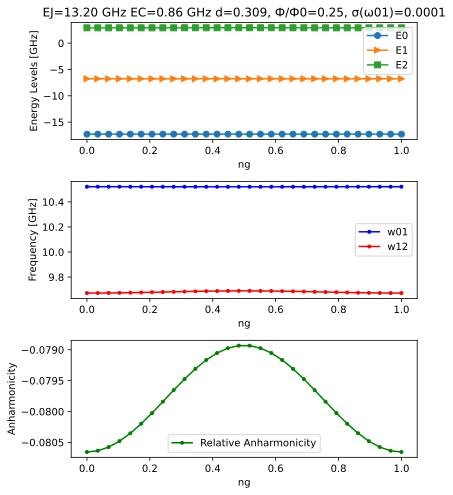

0.0011458262644192954


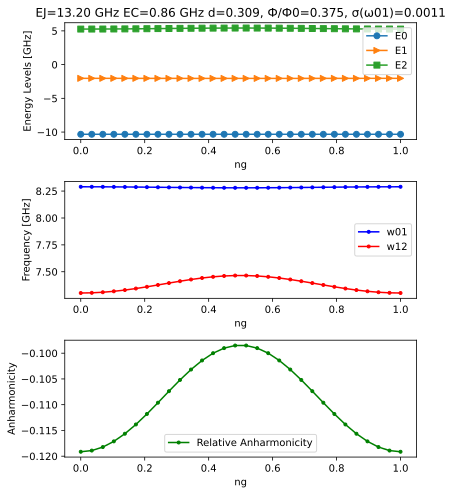

0.009746552468207994


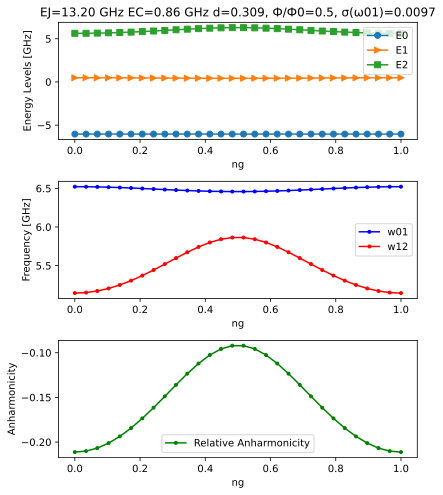

In [49]:
import numpy as np
import matplotlib.pyplot as plt

ng1_list = np.linspace(0, 1, N_ng1)

# Indices along the line ng1 + ng2 = 1
line_indices = [i for i in range(N_ng1)]

for k, flux_value in enumerate(flux_list):
    # Extract values along the line ng1 + ng2 = 1
    w01_line = [w01_list[i, k] for i in line_indices]
    w12_line = [w12_list[i, k] for i in line_indices]
    anharmonicity_line = [relative_anharm_list[i, k] for i in line_indices]
    E0_line = [E0_list[i, k] for i in line_indices]
    E1_line = [E1_list[i, k] for i in line_indices]
    E2_line = [E2_list[i, k] for i in line_indices]
    ng1_line = ng1_list[:len(line_indices)]  # Corresponding ng2 values along the line

    # Plotting the data
    fig, axes = plt.subplots(3, 1, figsize=(6, 7))

    uncert = (max(w01_line) - min(w01_line)) / max(w01_line)
    print(uncert)

    # axes[0].set_title("N={}, M={}, EJN/EC={}, EJM/EC={}, EC={} GHz, flux={}, uncert={}".format(nmon.N, nmon.M, int(nmon.EJN/nmon.EC_shunt), int(nmon.EJM/nmon.EC_shunt),
                                                                            # round(nmon.EC_shunt, 2), flux_value, round(uncert, 3)))
    
    axes[0].set_title("EJ=13.20 GHz EC=0.86 GHz d={}, Ф/Ф0={}, σ(ω01)={}".format(d, flux_value, round(uncert, 4)))

    # Canvas 1: w01 and w12
    axes[1].plot(ng1_line, w01_line, label="w01", c='blue', marker=".")
    axes[1].plot(ng1_line, w12_line, label="w12", c='red', marker=".")

    axes[1].set_xlabel("ng")
    axes[1].set_ylabel("Frequency [GHz]")
    axes[1].legend()

    # Canvas 2: Anharmonicity
    axes[2].plot(ng1_line, anharmonicity_line, label="Relative Anharmonicity", color="green", marker=".")
    # axes[1].set_title("Anharmonicity along ng1 + ng2 = 1 (flux={})".format(flux_value))
    axes[2].set_xlabel("ng")
    axes[2].set_ylabel("Anharmonicity")
    axes[2].legend()

    # Canvas 3: E0, E1, and E2
    axes[0].plot(ng1_line, E0_line, label="E0", marker="o")
    axes[0].plot(ng1_line, E1_line, label="E1", marker=">")
    axes[0].plot(ng1_line, E2_line, label="E2", marker="s")
    # axes[2].set_title("E0, E1, E2 along ng1 + ng2 = 1 (flux={})".format(flux_value))
    axes[0].set_xlabel("ng")
    axes[0].set_ylabel("Energy Levels [GHz]")
    axes[0].legend()

    # Save the plot for this flux value
    plt.tight_layout()
    plt.savefig("./data_arrays_ng/line_plot_flux_{}.pdf".format(flux_value))
    plt.show()
